# Data Preprocessing

## Imports

Import libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2, glob, os, pickle
from src.preprocessing import *

Import labels

In [3]:
labels_df = pd.read_csv('data/raw/train.csv', dtype={'Id': 'str'})
print(labels_df.head())
print(labels_df.shape)

           Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale
(25361, 2)


Number and distribution of classes

No of classes: 5005


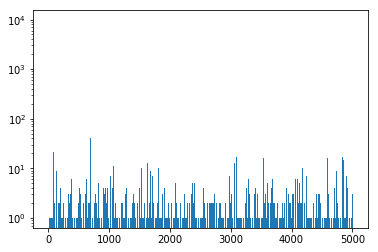

In [3]:
classes_unique = list(set(labels_df['Id']))
print('No of classes:', len(classes_unique))
class_count_list = [labels_df[labels_df['Id'] == class_id].shape[0]\
                    for class_id in classes_unique]
plt.figure()
plt.bar(list(range(len(classes_unique))), class_count_list)
plt.xlabel('')
plt.yscale('log')
plt.show()

Import one train image

Image shape: (700, 1050, 3)


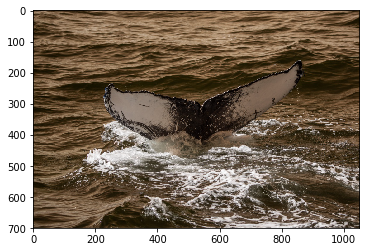

In [8]:
image = cv2.imread('data/raw/train/0000e88ab.jpg')
print('Image shape:', image.shape)
plt.imshow(image)

Resize image

Resized image shape: (224, 224, 3)


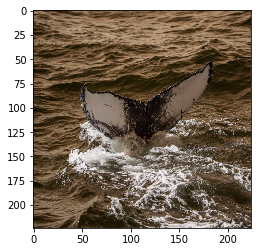

In [9]:
resize_width = 224
image_resized = cv2.resize(image, (resize_width, resize_width))
plt.imshow(image_resized)
print('Resized image shape:', image_resized.shape)

Import training set images and convert to NumPy arrays

In [4]:
train_file_list_original = glob.glob('data/raw/train/*.jpg')
train_file_list_short = [train_file.replace('data/raw/train/', '')\
                         for train_file in train_file_list_original]
print(train_file_list_short[:5])

['85332a7b4.jpg', '0b4b6d9d4.jpg', '8b00862f6.jpg', '0b39dab59.jpg', 'cb8335c44.jpg']


In [5]:
resize_width = 224
if os.path.exists('data/derived/data_train.pickle'):
    print('Path {} exists'.format('data/derived/data_train.pickle'))
else:
    data_train_list = [image_load_resize(train_file, resize_width)\
                       for train_file in train_file_list_original]
    data_train = np.stack(data_train_list)
    with open('data/derived/data_train.pickle', 'wb') as file:
        pickle.dump(data_train, file)
if os.path.exists('data/derived/labels_train.pickle'):
    print('Path {} exists'.format('data/derived/labels_train.pickle'))
else:
    labels_train = [labels_df[labels_df['Image'] == train_file_short]['Id'].to_string(header=False, index=False)\
                   for train_file_short in train_file_list_short]
    with open('data/derived/labels_train.pickle', 'wb') as file:
        pickle.dump(labels_train, file)
with open('data/derived/data_train.pickle', 'rb') as file:
    data_train = pickle.load(file)
with open('data/derived/labels_train.pickle', 'rb') as file:
    labels_train = pickle.load(file)

print('data_train:', data_train[:1])
print('Training data shape:', data_train.shape)
print('labels_train:', labels_train[:5])
print('Training labels length:', len(labels_train))

Path data/derived/labels_train.pickle exists
data_train: [[[[168 140 132]
   [165 130 118]
   [167 132 105]
   ...
   [174 161 162]
   [171 178 180]
   [176 187 191]]

  [[180 152 142]
   [178 144 129]
   [176 142 115]
   ...
   [189 180 178]
   [192 196 203]
   [196 207 211]]

  [[176 150 134]
   [174 141 122]
   [178 143 116]
   ...
   [196 188 194]
   [200 201 213]
   [200 210 214]]

  ...

  [[253 252 254]
   [252 254 254]
   [253 251 251]
   ...
   [254 252 249]
   [252 249 241]
   [251 248 244]]

  [[253 254 252]
   [254 254 254]
   [254 255 253]
   ...
   [253 254 253]
   [253 253 253]
   [253 253 253]]

  [[236 237 236]
   [237 237 237]
   [237 237 235]
   ...
   [237 238 236]
   [237 237 237]
   [237 237 237]]]]
Training data shape: (25361, 224, 224, 3)
labels_train: ['w_025911c', 'new_whale', 'new_whale', 'new_whale', 'new_whale']
Training labels length: 25361


In [6]:
test_file_list_original = glob.glob('data/raw/test/*.jpg')
test_file_list_short = [test_file.replace('data/raw/test/', '')\
                         for test_file in test_file_list_original]
if os.path.exists('data/derived/test_file_names.pickle'):
    print('Path {} exists'.format('data/derived/test_file_names.pickle'))
else:
    with open('data/derived/test_file_names.pickle', 'wb') as file:
        pickle.dump(test_file_list_short, file)
print(test_file_list_short[:5])

['c303faac6.jpg', '96c2b7290.jpg', '69f6cd44f.jpg', 'a965dea33.jpg', '9a225e056.jpg']


In [7]:
resize_width = 224
if os.path.exists('data/derived/data_test.pickle'):
    print('Path {} exists'.format('data/derived/data_test.pickle'))
else:
    data_test_list = [image_load_resize(test_file, resize_width)\
                       for test_file in test_file_list_original]
    data_test = np.stack(data_test_list)
    with open('data/derived/data_test.pickle', 'wb') as file:
        pickle.dump(data_test, file)
with open('data/derived/data_test.pickle', 'rb') as file:
    data_test = pickle.load(file)
print('data_test:', data_test[:2])
print('Test data shape:', data_test.shape)

data_test: [[[[211 211 211]
   [210 210 210]
   [209 209 209]
   ...
   [209 209 209]
   [212 212 212]
   [218 218 218]]

  [[206 206 206]
   [203 203 203]
   [208 208 208]
   ...
   [211 211 211]
   [218 218 218]
   [210 210 210]]

  [[203 203 203]
   [195 195 195]
   [204 204 204]
   ...
   [207 207 207]
   [203 203 203]
   [195 195 195]]

  ...

  [[252 252 252]
   [252 252 252]
   [252 252 252]
   ...
   [252 252 252]
   [252 252 252]
   [252 252 252]]

  [[252 252 252]
   [252 252 252]
   [252 252 252]
   ...
   [252 252 252]
   [252 252 252]
   [252 252 252]]

  [[252 252 252]
   [252 252 252]
   [252 252 252]
   ...
   [252 252 252]
   [252 252 252]
   [252 252 252]]]


 [[[222 190 143]
   [216 174 122]
   [193 150  93]
   ...
   [228 195 148]
   [243 204 155]
   [234 200 150]]

  [[185 145  96]
   [202 160 107]
   [203 159 105]
   ...
   [222 182 121]
   [232 197 143]
   [235 204 153]]

  [[220 178 127]
   [228 189 136]
   [236 197 145]
   ...
   [203 161 106]
   [217 178 127]
